## Organize Dataset

In [148]:
import os
import shutil

def organize_images(source_folder, output_folder, train_ratio=0.7):
    # Create folders for each digit from 1 to 5 in both train and test datasets
    for i in range(1, 6):
        train_subfolder_name = f"{i}_train"
        test_subfolder_name = f"{i}_test"

        os.makedirs(os.path.join(output_folder, train_subfolder_name), exist_ok=True)
        os.makedirs(os.path.join(output_folder, test_subfolder_name), exist_ok=True)

    # Organize images into train and test datasets based on the first digit
    for image_name in os.listdir(source_folder):
        # Ensure the file name is not empty
        if image_name:
            try:
                # Extract the first part of the image name before the underscore
                first_digit = int(image_name.split('_')[0])

                # Check if the first digit is between 1 and 5 
                if 1 <= first_digit <= 5:
                    source_path = os.path.join(source_folder, image_name)

                    # Decide whether to add to train or test dataset based on the ratio
                    if hash(image_name) % 100 < train_ratio * 100:
                        destination_folder = os.path.join(output_folder, f"{first_digit}_train")
                    else:
                        destination_folder = os.path.join(output_folder, f"{first_digit}_test")

                    destination_path = os.path.join(destination_folder, image_name)

                    print(f"Copying {source_path} to {destination_path}")

                    # Copy the image to the corresponding folder
                    shutil.copy(source_path, destination_path)
            except (ValueError, IndexError):
                print(f"Skipping file: {image_name} (Does not match expected naming pattern)")

# usage
source_folder_path = r"C:\Users\andre\Downloads\ml\project\New folder (3)\New folder (2)\b\a"
output_folder_path = r"C:\Users\andre\Downloads\ml\project\New folder (3)\New folder (2)\New folder (2)"

organize_images(source_folder_path, output_folder_path, train_ratio=0.7)


Skipping file: .DS_Store (Does not match expected naming pattern)
Copying C:\Users\andre\Downloads\ml\project\New folder (3)\New folder (2)\b\a\1_0_0_20161219140623097.jpg to C:\Users\andre\Downloads\ml\project\New folder (3)\New folder (2)\New folder (2)\1_test\1_0_0_20161219140623097.jpg
Copying C:\Users\andre\Downloads\ml\project\New folder (3)\New folder (2)\b\a\1_0_0_20161219140627985.jpg to C:\Users\andre\Downloads\ml\project\New folder (3)\New folder (2)\New folder (2)\1_test\1_0_0_20161219140627985.jpg
Copying C:\Users\andre\Downloads\ml\project\New folder (3)\New folder (2)\b\a\1_0_0_20161219140642920.jpg to C:\Users\andre\Downloads\ml\project\New folder (3)\New folder (2)\New folder (2)\1_test\1_0_0_20161219140642920.jpg
Copying C:\Users\andre\Downloads\ml\project\New folder (3)\New folder (2)\b\a\1_0_0_20161219154018476.jpg to C:\Users\andre\Downloads\ml\project\New folder (3)\New folder (2)\New folder (2)\1_train\1_0_0_20161219154018476.jpg
Copying C:\Users\andre\Downloads\

# Image Processing ( Age Estimation )

## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import os
import skimage
import skimage.io
from skimage import transform 
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage import transform
import cv2

## Load Data From The Dataset Directory And Preprocessing The Images At The Same Time ( Without Hog Algorithm )

In [4]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                    if os.path.isdir(os.path.join(data_directory, d))]

    # creating images and labels lists to load the data in them
    labels = []
    images = []
    
    # create for loop to iterate over the directories stored above
    for d in directories:
        label_directory = os.path.join(data_directory, d)
                
        # create file names to store the image files names which stored in each directory
        file_names = [os.path.join(label_directory, f) 
                        for f in os.listdir(label_directory) 
                        if f.endswith(".jpg")]
        
        # load the images and procces it and we extract the label of the image from the directory name
        for f in file_names:
            print(f)
            img = skimage.io.imread(f)
            img_resized=resize(img,(28,28,3))
            gray_img=rgb2gray(img_resized)
            images.append(gray_img.flatten())
            labels.append(int(d))
    return images, labels

## Link The Dataset With The Right Path On The Pc

In [5]:
ROOT_PATH = r"C:\Users\andre\Downloads\ml\project\New folder (3)\New folder (2)\image_dataset"
train_data_directory = os.path.join(ROOT_PATH, "Training") # train images = 1839
test_data_directory = os.path.join(ROOT_PATH, "Testing")  # test images = 774

## Call The Load Function On The Training Data ( Take About 30 Minutes To Load  )


In [6]:
images, labels = load_data(train_data_directory)

C:\Users\andre\Downloads\ml\project\New folder (3)\New folder (2)\image_dataset\Training\1\1_0_0_20161219140623097.jpg
C:\Users\andre\Downloads\ml\project\New folder (3)\New folder (2)\image_dataset\Training\1\1_0_0_20161219140642920.jpg
C:\Users\andre\Downloads\ml\project\New folder (3)\New folder (2)\image_dataset\Training\1\1_0_0_20161219154018476.jpg
C:\Users\andre\Downloads\ml\project\New folder (3)\New folder (2)\image_dataset\Training\1\1_0_0_20161219154556757.jpg
C:\Users\andre\Downloads\ml\project\New folder (3)\New folder (2)\image_dataset\Training\1\1_0_0_20161219160659230.jpg
C:\Users\andre\Downloads\ml\project\New folder (3)\New folder (2)\image_dataset\Training\1\1_0_0_20161219160713534.jpg
C:\Users\andre\Downloads\ml\project\New folder (3)\New folder (2)\image_dataset\Training\1\1_0_0_20161219161028662.jpg
C:\Users\andre\Downloads\ml\project\New folder (3)\New folder (2)\image_dataset\Training\1\1_0_0_20161219163425847.jpg
C:\Users\andre\Downloads\ml\project\New folder (

## Print (Check) The Number Of Train Images That Are Correctly Loaded


In [7]:

len(images)

1839

## converting the list of images into a NumPy array


In [8]:
flat_images = np.array(images)

## converting a list of labels into a NumPy array

In [9]:
target = np.array(labels)

In [10]:
df = pd.DataFrame(flat_images) #dataframe

df['Target'] = target

x_train = df.iloc[:,:-1] #input data 

y_train = df.iloc[:,-1] #output data

## Call The Load Function On The Testing Data ( Take About 10 Minutes To Load  )


In [11]:

images, labels = load_data(test_data_directory)

C:\Users\andre\Downloads\ml\project\New folder (3)\New folder (2)\image_dataset\Testing\1\1_0_0_20161219140627985.jpg
C:\Users\andre\Downloads\ml\project\New folder (3)\New folder (2)\image_dataset\Testing\1\1_0_0_20161219154724341.jpg
C:\Users\andre\Downloads\ml\project\New folder (3)\New folder (2)\image_dataset\Testing\1\1_0_0_20161219154909149.jpg
C:\Users\andre\Downloads\ml\project\New folder (3)\New folder (2)\image_dataset\Testing\1\1_0_0_20161219154956869.jpg
C:\Users\andre\Downloads\ml\project\New folder (3)\New folder (2)\image_dataset\Testing\1\1_0_0_20161219162630727.jpg
C:\Users\andre\Downloads\ml\project\New folder (3)\New folder (2)\image_dataset\Testing\1\1_0_0_20161219192524675.jpg
C:\Users\andre\Downloads\ml\project\New folder (3)\New folder (2)\image_dataset\Testing\1\1_0_0_20161219194004596.jpg
C:\Users\andre\Downloads\ml\project\New folder (3)\New folder (2)\image_dataset\Testing\1\1_0_0_20161219200139603.jpg
C:\Users\andre\Downloads\ml\project\New folder (3)\New f

## Print (Check) The Number Of Train Images That Are Correctly Loaded


In [13]:

len(images)

774

## converting the list of images into a NumPy array


In [14]:
flat_test_images = np.array(images)

## converting a list of labels into a NumPy array

In [15]:
test_target = np.array(labels)

In [16]:
df = pd.DataFrame(flat_test_images) #dataframe

df['Target'] = test_target

x_test = df.iloc[:,:-1] # take all without the last column ( input data )

y_test = df.iloc[:,-1] # take only the last column ( output data )

# Logistic Regression Model Fitting To The Data

## Import Logistic Regression Model

In [17]:
from sklearn.linear_model import LogisticRegression

## Initialize Logistic Regression model and train it

In [18]:

model = LogisticRegression(solver='liblinear')

History = model.fit(x_train,y_train)

## generate predictions on the test images

In [19]:

y_predict = model.predict(x_test)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 5, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 4, 1, 3, 2, 5, 1, 1, 1, 4, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 5, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 5, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 3, 2, 2, 1, 1, 3, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       3, 2, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 3, 4, 1, 1, 2,
       2, 1, 4, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 5, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,

# Model Evaluation

## Calculate The Accuracy

In [20]:

from sklearn.metrics import accuracy_score

accuracy_score(y_predict, y_test)

0.43281653746770027

## Generate And Show Confusion Matrix

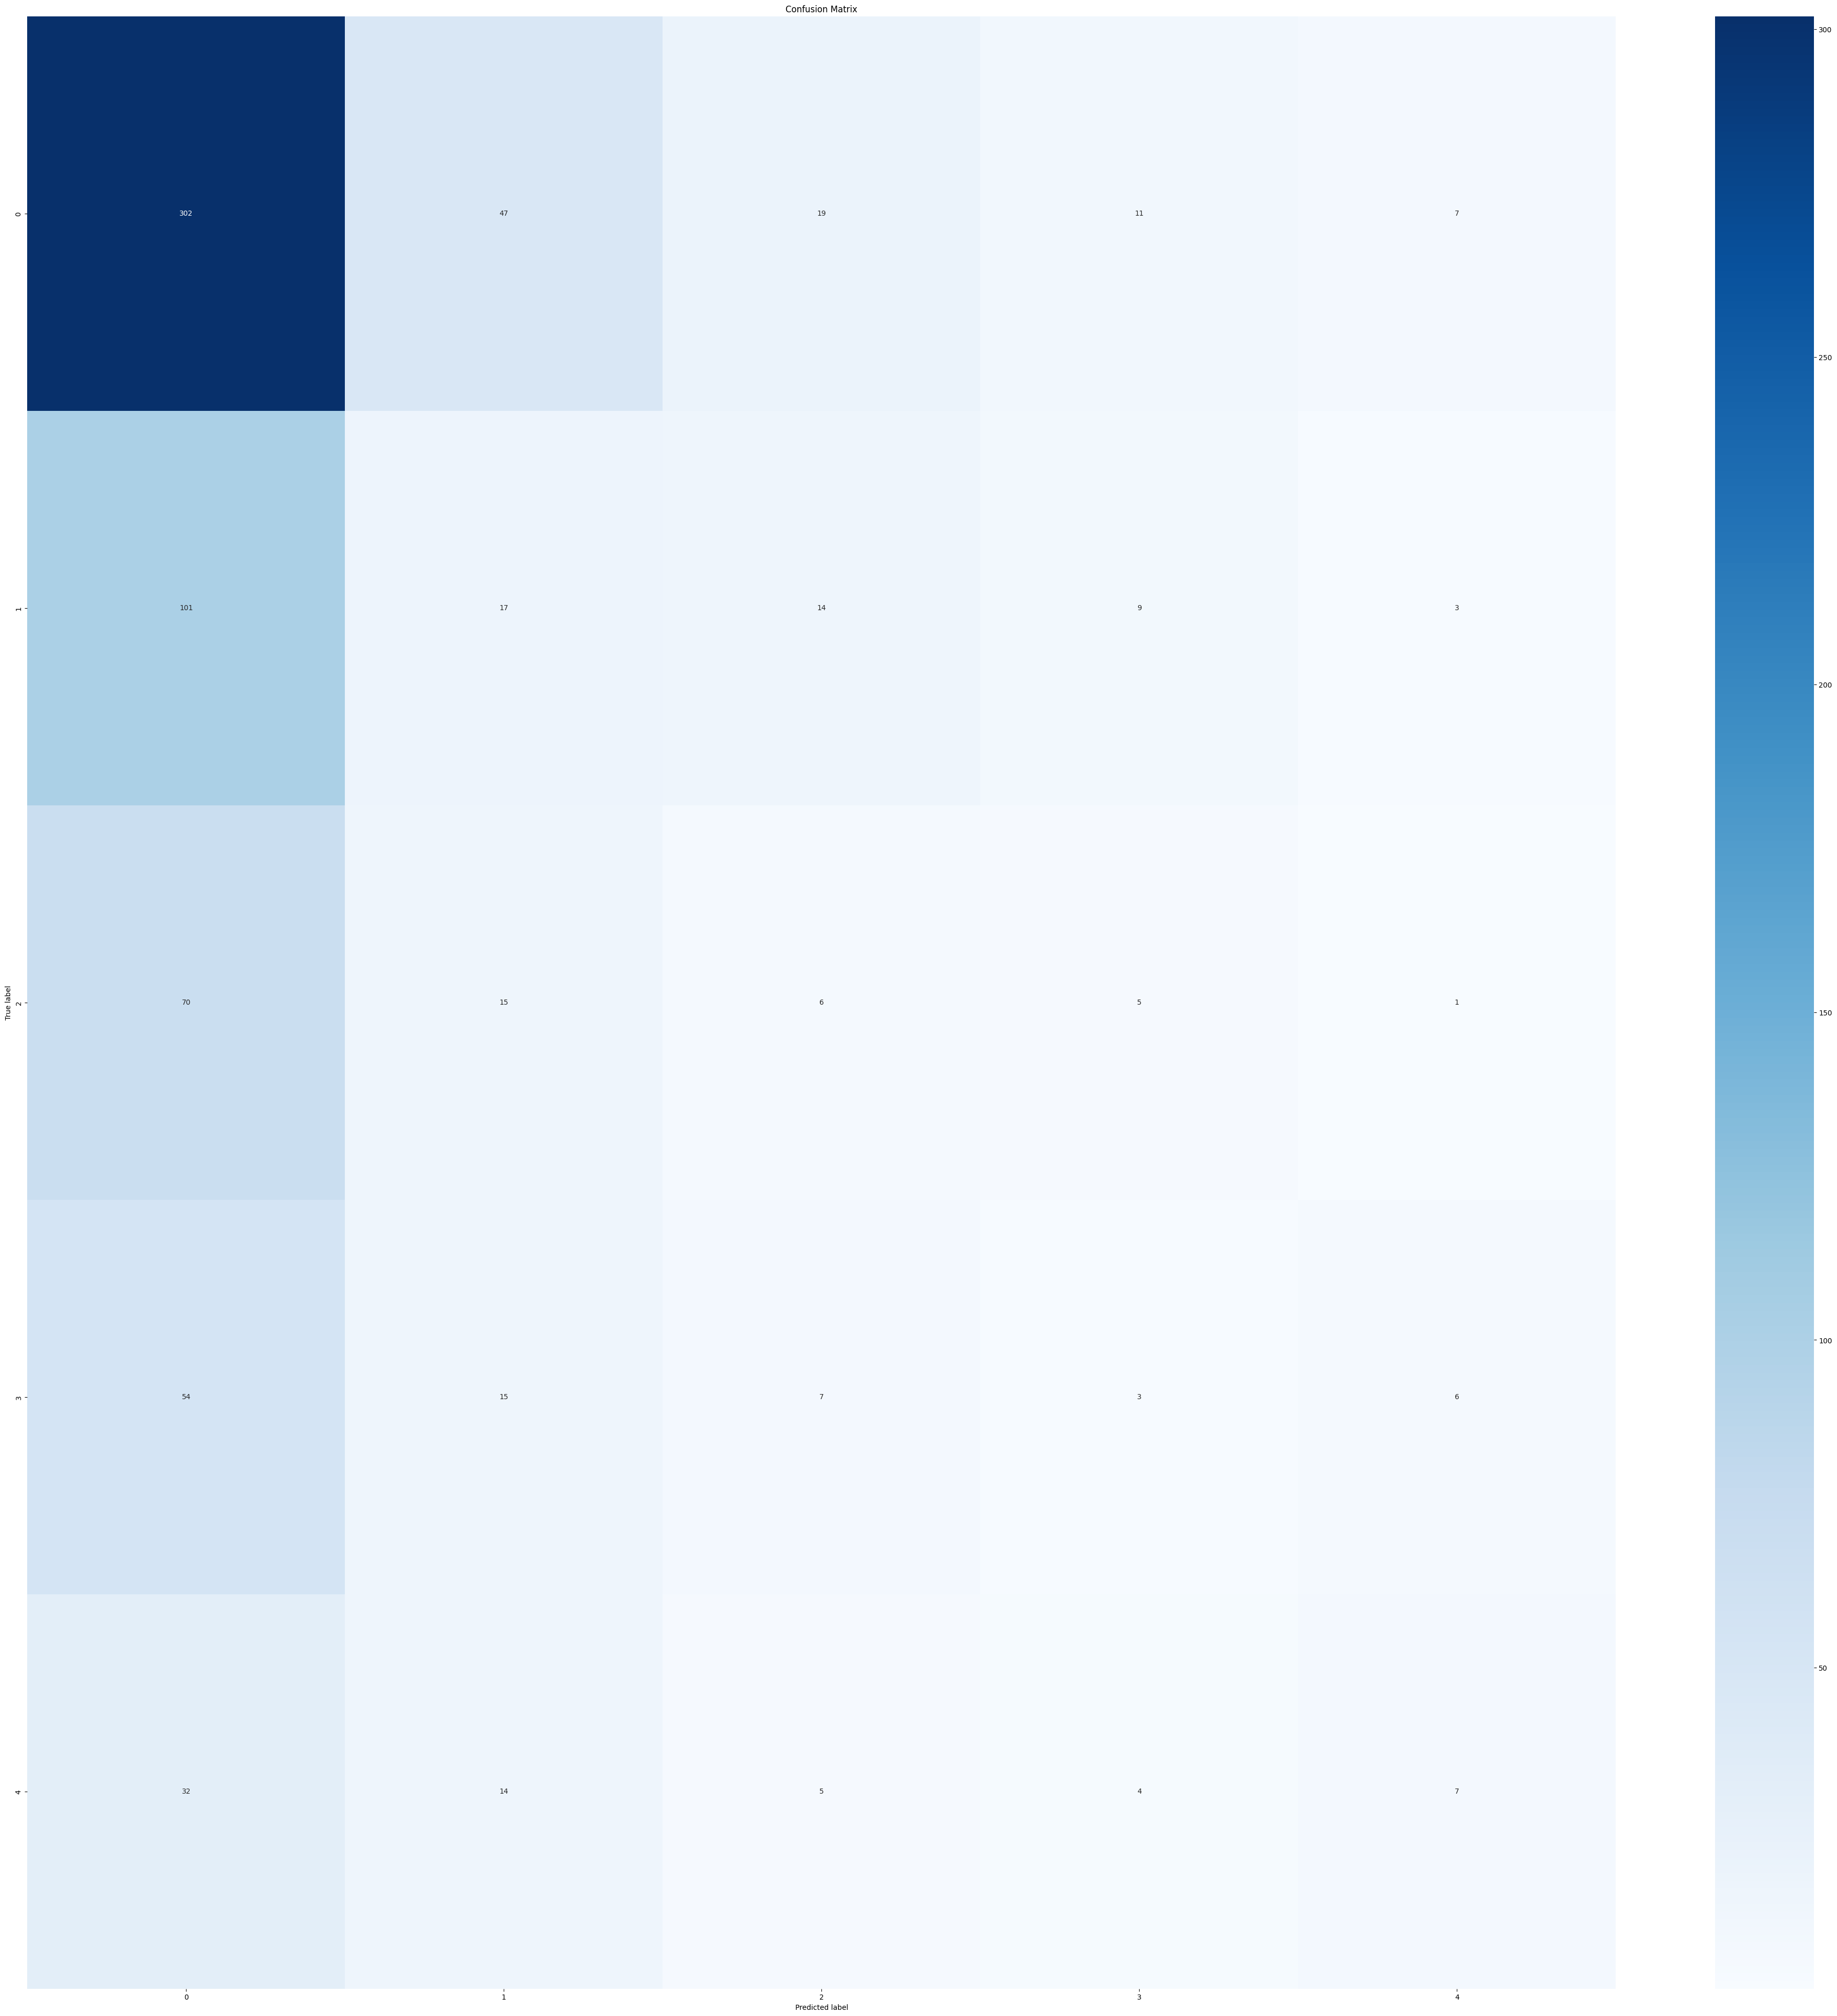

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


conf_matrix = confusion_matrix(y_test, y_predict)

# Plot confusion matrix 
plt.figure(figsize=(50, 50))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Applying Logistic Regression With Feature Extraction Using HOG ( 5 Classes )


## Load Data From The Dataset Directory Without Preprocessing

In [22]:
def load_data(data_directory, num_directories=5):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    
    for i, d in enumerate(directories):
        if i >= num_directories:
            break
        
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".jpg")]
        
        for f in file_names:
            img = skimage.io.imread(f)
            images.append(img)
            labels.append(int(d))
            
    return images, labels

## Link The Dataset With The Right Path On The Pc

In [23]:
ROOT_PATH = r"C:\Users\andre\Downloads\ml\project\New folder (3)\New folder (2)\image_dataset"
train_data_directory = os.path.join(ROOT_PATH, "Training") # train images = 1400
test_data_directory = os.path.join(ROOT_PATH, "Testing")  # test images = 600

train_images, train_labels = load_data(train_data_directory, num_directories=5)

test_images, test_labels = load_data(test_data_directory, num_directories=5)

## Print (Check) The Number Of Test Images That Are Correctly Loaded


In [24]:
len (test_images)


774

## Print (Check) The Number Of Train Images That Are Correctly Loaded


In [25]:
len (train_images)

1839

## Print (Check) The Number Of Train Labels That Are Correctly Loaded


In [26]:
train_labels[1282]

2

## Print (Check) The Number Of Train Labels That Are Correctly Loaded


In [27]:
train_labels[0]

1

## Preprocess The Images To Feed It To The HOG Algorithm

In [28]:
import cv2
import numpy as np

# Preprocess Images for HOG algorithm
def preprocess_images_for_hog(images, size=(32, 32)):
    processed_images = []
    for img in images:
        # Resize the image
        resized_img = cv2.resize(img, size, interpolation=cv2.INTER_AREA)
        
        # see if the image is already in grayscale
        if len(resized_img.shape) == 2 or resized_img.shape[-1] == 1:
            grayscale_img = resized_img
        else:
            # Convert to grayscale
            grayscale_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
        
        # Explicitly set the size for grayscale images
        grayscale_img = cv2.resize(grayscale_img, size, interpolation=cv2.INTER_AREA)

        # Print the shape for debugging
        print("Processed image shape:", grayscale_img.shape)
        
        processed_images.append(grayscale_img)
    return np.array(processed_images)

# Preprocess train and test images
train_images_processed = preprocess_images_for_hog(train_images)
test_images_processed = preprocess_images_for_hog(test_images)


Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processe

## Apply The HOG Feature Extraction Algorithm To The Data

In [29]:
from sklearn.linear_model import LogisticRegression
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Compute HOG features for Training images
train_hog_features = []
for img in train_images_processed:
    hog_img = hog(img, visualize=False)
    train_hog_features.append(hog_img)


## Load The Model And Train

In [30]:
# Train logistic regression model

logreg = LogisticRegression(max_iter=1000)

logreg.fit(train_hog_features, train_labels)

LogisticRegression(max_iter=1000)

In [31]:
from sklearn.linear_model import LogisticRegression
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Compute HOG features for testing images
test_hog_features = []
for img in test_images_processed:
    hog_img = hog(img, visualize=False)
    test_hog_features.append(hog_img)

## Generate Predictions And Evaluate The Model 

In [32]:
# Predict on test set
predictions = logreg.predict(test_hog_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy of logistic regression with HOG features: {accuracy}")

Accuracy of logistic regression with HOG features: 0.479328165374677


# Applying Logistic Regression With Feature Extraction Using HOG ( 2 Classes )


In [33]:
def load_data(data_directory, num_directories=2):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    
    for i, d in enumerate(directories):
        if i >= num_directories:
            break
        
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".jpg")]
        
        for f in file_names:
            img = skimage.io.imread(f)
            images.append(img)
            labels.append(int(d))
            
    return images, labels

In [34]:
ROOT_PATH = r"C:\Users\andre\Downloads\ml\project\New folder (3)\New folder (2)\image_dataset"
train_data_directory = os.path.join(ROOT_PATH, "Training") # train images = 1283
test_data_directory = os.path.join(ROOT_PATH, "Testing")  # test images = 530

train_images, train_labels = load_data(train_data_directory, num_directories=2)

test_images, test_labels = load_data(test_data_directory, num_directories=2)

In [35]:
len (test_images)


530

In [36]:
len (train_images)

1283

In [37]:
train_labels[1282]

2

In [38]:
train_labels[0]

1

In [39]:
import cv2
import numpy as np

# Preprocess Images for HOG
def preprocess_images_for_hog(images, size=(32, 32)):
    processed_images = []
    for img in images:
        # Resize image
        resized_img = cv2.resize(img, size, interpolation=cv2.INTER_AREA)
        
        # see if the image is already in grayscale
        if len(resized_img.shape) == 2 or resized_img.shape[-1] == 1:
            grayscale_img = resized_img
        else:
            # Convert to grayscale
            grayscale_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
        
        # Explicitly set the size for grayscale images
        grayscale_img = cv2.resize(grayscale_img, size, interpolation=cv2.INTER_AREA)

        # Print the shape for debugging
        print("Processed image shape:", grayscale_img.shape)
        
        processed_images.append(grayscale_img)
    return np.array(processed_images)

# Preprocess train and test images
train_images_processed = preprocess_images_for_hog(train_images)
test_images_processed = preprocess_images_for_hog(test_images)


Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processed image shape: (32, 32)
Processe

In [40]:
from sklearn.linear_model import LogisticRegression
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Compute HOG features for Training images
train_hog_features = []
for img in train_images_processed:
    hog_img = hog(img, visualize=False)
    train_hog_features.append(hog_img)

In [41]:
# Train logistic regression model

logreg = LogisticRegression(max_iter=1000)

logreg.fit(train_hog_features, train_labels)

LogisticRegression(max_iter=1000)

In [42]:
from sklearn.linear_model import LogisticRegression
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Compute HOG features for test images
test_hog_features = []
for img in test_images_processed:
    hog_img = hog(img, visualize=False)
    test_hog_features.append(hog_img)

In [43]:
# Predict on test set
predictions = logreg.predict(test_hog_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy of logistic regression with HOG features: {accuracy}")

Accuracy of logistic regression with HOG features: 0.6962264150943396


# Confusion Matrix

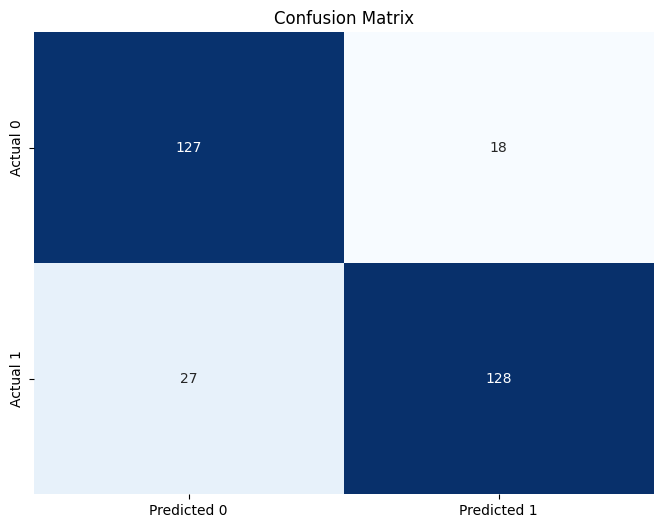

In [58]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression


X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Get predictions on the test set
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()


# Roc Curve

Accuracy: 0.8500


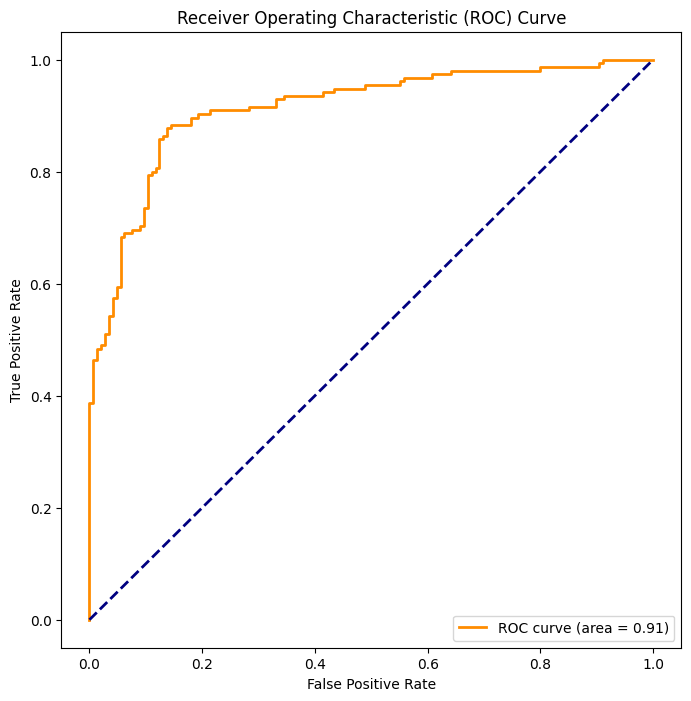

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression


X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability scores for ROC curve

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Logistic Loss

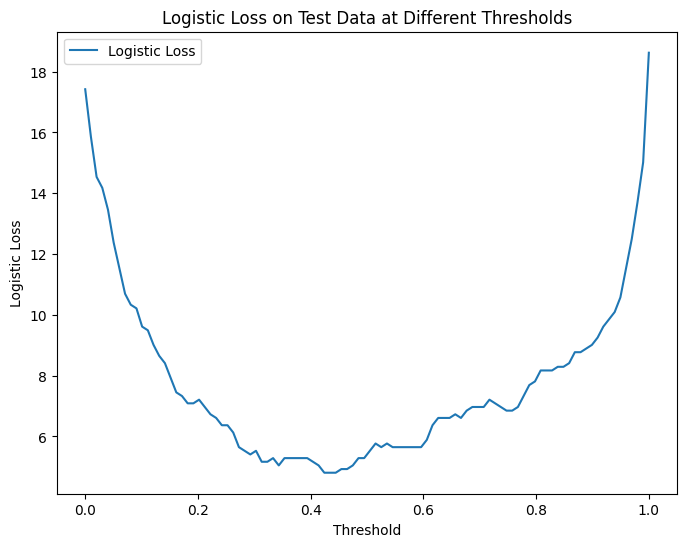

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import log_loss


X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Get predicted probabilities on the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate logistic loss at different thresholds
thresholds = np.linspace(0, 1, 100)
loss_values = [log_loss(y_test, (y_prob > threshold).astype(int)) for threshold in thresholds]

# Plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, loss_values, label='Logistic Loss')
plt.title('Logistic Loss on Test Data at Different Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Logistic Loss')
plt.legend()
plt.show()


# Kmeans Model

Accuracy: 0.5697583787996883
Silhouette Coefficient: 0.17459127519351436
Calinski-Harabasz Score: 281.56693799155323
Davies-Bouldin Index: 2.0263179690082835


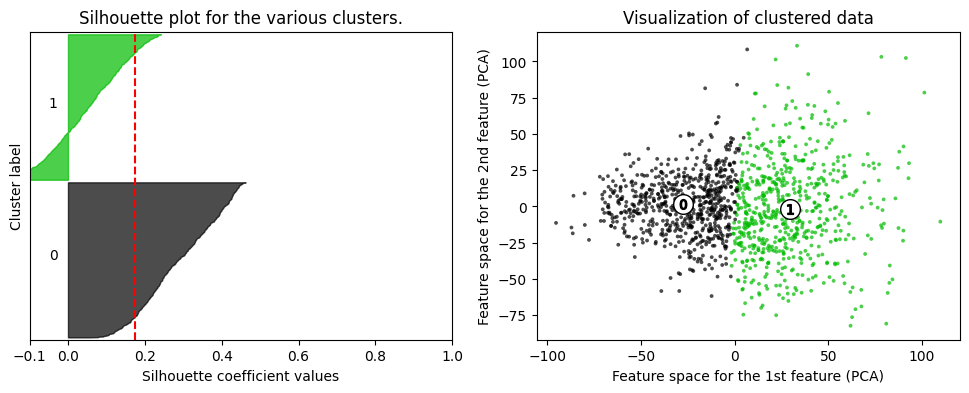

In [73]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from skimage.feature import hog
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

def load_data(directory, num_directories):
    images = []
    labels = []

    for i in range(1, num_directories + 1):
        subdirectory = os.path.join(directory, str(i))
        for filename in os.listdir(subdirectory):
            filepath = os.path.join(subdirectory, filename)
            img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (8, 8))  # Resize images to a consistent size
            images.append(img)
            labels.append(i - 1)

    return np.array(images), np.array(labels)

def extract_hog_features(images):
    hog_features = []
    for image in images:
        _, hog_feature = hog(image, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(1, 1), visualize=True)
        hog_features.append(hog_feature.flatten())
    return np.array(hog_features)

# Load image dataset
ROOT_PATH = r"C:\Users\andre\Downloads\ml\project\New folder (3)\New folder (2)\image_dataset"
train_data_directory = os.path.join(ROOT_PATH, "Training")
test_data_directory = os.path.join(ROOT_PATH, "Testing")

train_images, train_labels = load_data(train_data_directory, num_directories=2)
test_images, test_labels = load_data(test_data_directory, num_directories=2)

# Extract HOG features
hog_features = extract_hog_features(train_images)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=50)  
hog_features_pca = pca.fit_transform(hog_features)

# Apply k-means clustering
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
predicted_labels = kmeans.fit_predict(hog_features_pca)

# Evaluate the results
accuracy = metrics.accuracy_score(train_labels, predicted_labels)
print(f"Accuracy: {accuracy}")

# Additional clustering metrics
silhouette_coefficient = silhouette_score(hog_features_pca, predicted_labels)
calinski_harabasz_score = metrics.calinski_harabasz_score(hog_features_pca, predicted_labels)
davies_bouldin_index = metrics.davies_bouldin_score(hog_features_pca, predicted_labels)


print(f"Silhouette Coefficient: {silhouette_coefficient}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score}")
print(f"Davies-Bouldin Index: {davies_bouldin_index}")


# Visualize the results using silhouette analysis
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

# The 1st subplot is the silhouette plot
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(hog_features_pca) + (n_clusters + 1) * 10])

# Compute the silhouette scores for each sample using PCA-transformed data
sample_silhouette_values = silhouette_samples(hog_features_pca, predicted_labels)

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[predicted_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.set_title("Silhouette plot for the various clusters.")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")

ax1.axvline(x=silhouette_coefficient, color="red", linestyle="--")
ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = plt.cm.nipy_spectral(predicted_labels.astype(float) / n_clusters)
ax2.scatter(hog_features_pca[:, 0], hog_features_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

centers = kmeans.cluster_centers_
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

ax2.set_title("Visualization of clustered data")
ax2.set_xlabel("Feature space for the 1st feature (PCA)")
ax2.set_ylabel("Feature space for the 2nd feature (PCA)")

plt.show()


